# Student Performance Indicator Project

## Importing Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV data as Pandas Dataframe

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

### Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [4]:
df.shape

(1000, 8)

## Data Checking

### Checking for missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset.

### Checking for duplicate rows

In [6]:
df.duplicated().sum()

0

There are no duplicate values in the dataset.

### Check data type and null

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the number of unique values in each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Check statistics of data

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight :
* All means are very close ~ 66 to 68
* All standard deviations are close as well
* Minimum score for maths is 0, reading score is 17 and writing score is 10

## Exploring data

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print(df['race/ethnicity'].unique())

['group B' 'group C' 'group A' 'group D' 'group E']


### Changing the name of the columns

In [12]:
df.rename(columns = {'race/ethnicity':'race_ethnicity'}, inplace=True)
df.rename(columns = {'parental level of education':'parental_level_of_education'}, inplace=True)
df.rename(columns = {'test preparation course':'test_preparation_course'}, inplace=True)
df.rename(columns = {'math score':'math_score'}, inplace=True)
df.rename(columns = {'reading score':'reading_score'}, inplace=True)
df.rename(columns = {'writing score':'writing_score'}, inplace=True)

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Printing all the categories in each non numerical columns

In [14]:
print("Categories in 'gender' column :", df['gender'].unique())
print("Categories in 'race_ethnicity' column :", df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' column :", df['parental_level_of_education'].unique())
print("Categories in 'lunch' column :", df['lunch'].unique())
print("Categories in 'test_preparation_course' column :", df['test_preparation_course'].unique())

Categories in 'gender' column : ['female' 'male']
Categories in 'race_ethnicity' column : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' column : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' column : ['standard' 'free/reduced']
Categories in 'test_preparation_course' column : ['none' 'completed']


### Defining numerical and non numerical columns

In [15]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Adding new columns for 'total_score' and 'average'

In [17]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Checking how many students got full marks in each

In [18]:
reading_full = df[df['reading_score'] == 100]['reading_score'].count()
writing_full = df[df['writing_score'] == 100]['writing_score'].count()
math_full = df[df['math_score'] == 100]['math_score'].count()

In [19]:
print('Total number of students getting full marks in reading :', reading_full)
print('Total number of students getting full marks in writing :', writing_full)
print('Total number of students getting full marks in math :', math_full)

Total number of students getting full marks in reading : 17
Total number of students getting full marks in writing : 14
Total number of students getting full marks in math : 7


In [20]:
reading_less_than_20 = df[df['reading_score'] < 20]['reading_score'].count()
writing_less_than_20 = df[df['writing_score'] < 20]['writing_score'].count()
math_less_than_20 = df[df['math_score'] < 20]['math_score'].count()

In [21]:
print('Total number of students getting less than 20 marks in reading :', reading_less_than_20)
print('Total number of students getting less than 20 marks in writing :', writing_less_than_20)
print('Total number of students getting less than 20 marks in math :', math_less_than_20)

Total number of students getting less than 20 marks in reading : 1
Total number of students getting less than 20 marks in writing : 3
Total number of students getting less than 20 marks in math : 4


## Insights :

* From the above we get students have performed the worst in maths.
* Best performance is in reading section.

## Exploring Data

### Visualizing average score distribution

### Histogram and Kernel Density Estimation (KDE) :

#### Histogram of averages

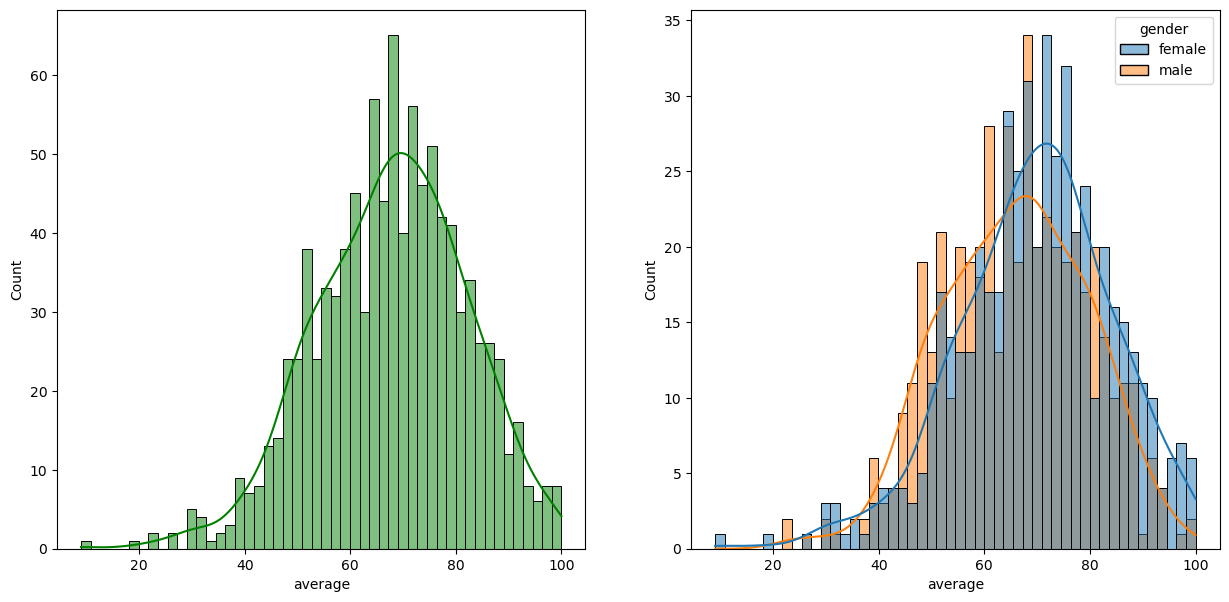

In [22]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=50, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=50, hue = 'gender', kde=True)
plt.show()

#### Histogram of total scores

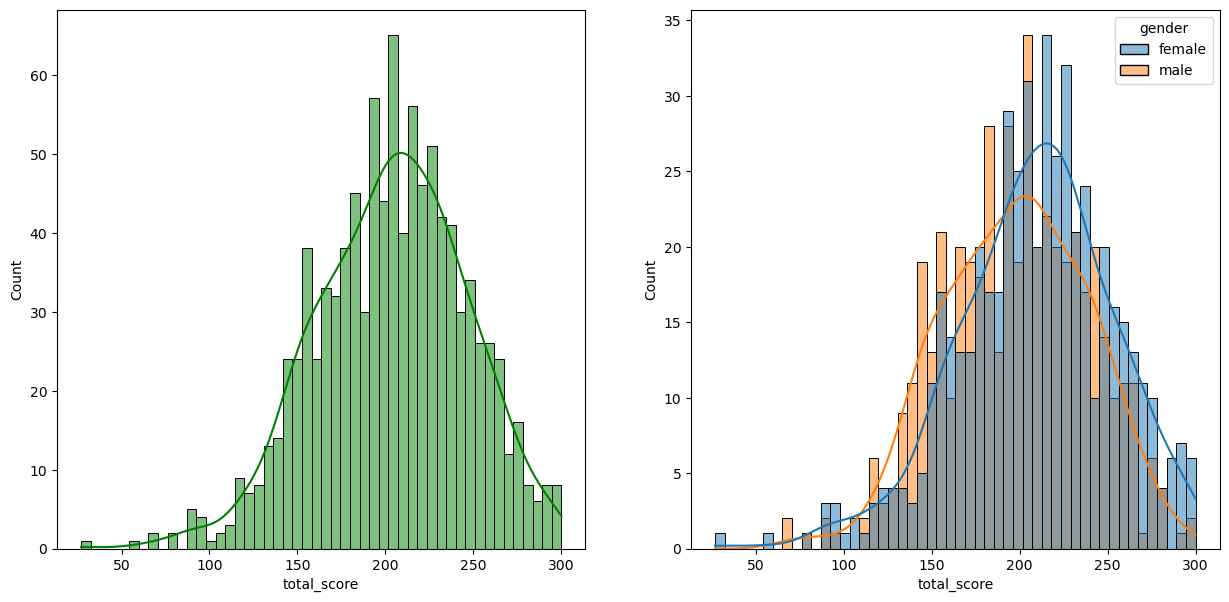

In [23]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=50, color='g', kde=True)
plt.subplot(122)
sns.histplot(data=df, x='total_score', bins=50, hue = 'gender', kde=True)
plt.show()

## Insights :
* Female students tend to perform better than male students

#### Histogram of lunches

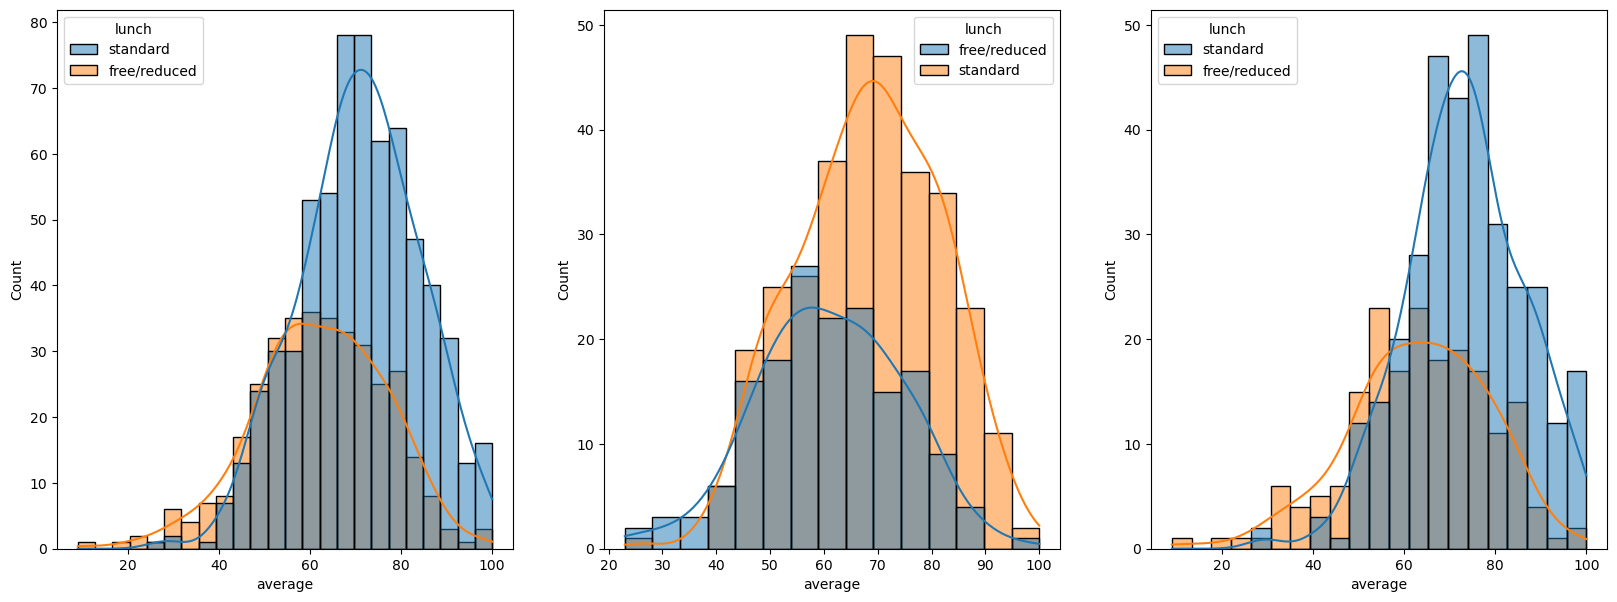

In [24]:
plt.subplots(1,3,figsize = (20,7))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue = 'lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='average',kde=True, hue= 'lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='average',kde=True, hue='lunch')
plt.show()

## Insights :

* Standard lunch helps perform well in exams be it male or female.

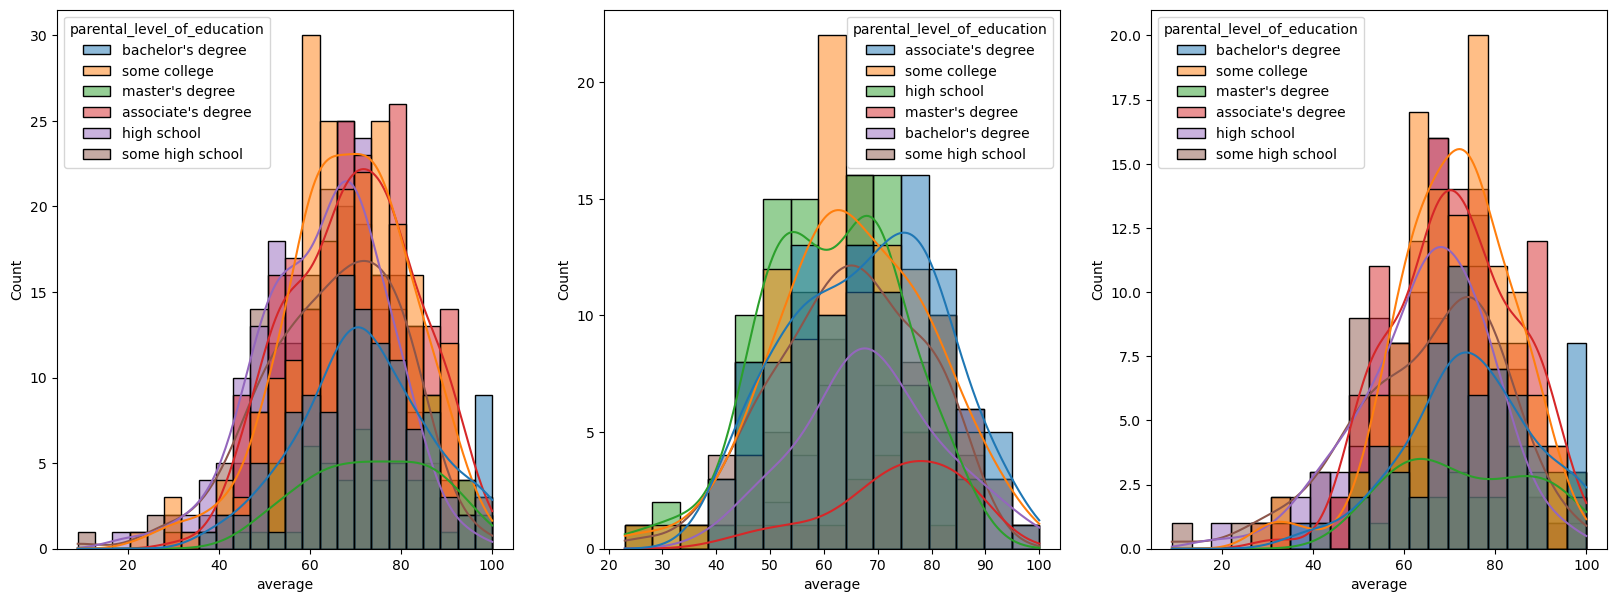

In [25]:
plt.subplots(1,3,figsize = (20,7))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue = 'parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='average',kde=True, hue= 'parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='average',kde=True, hue='parental_level_of_education')
plt.show()

## Insights :

* In general parent's education don't help students perform well in exam.

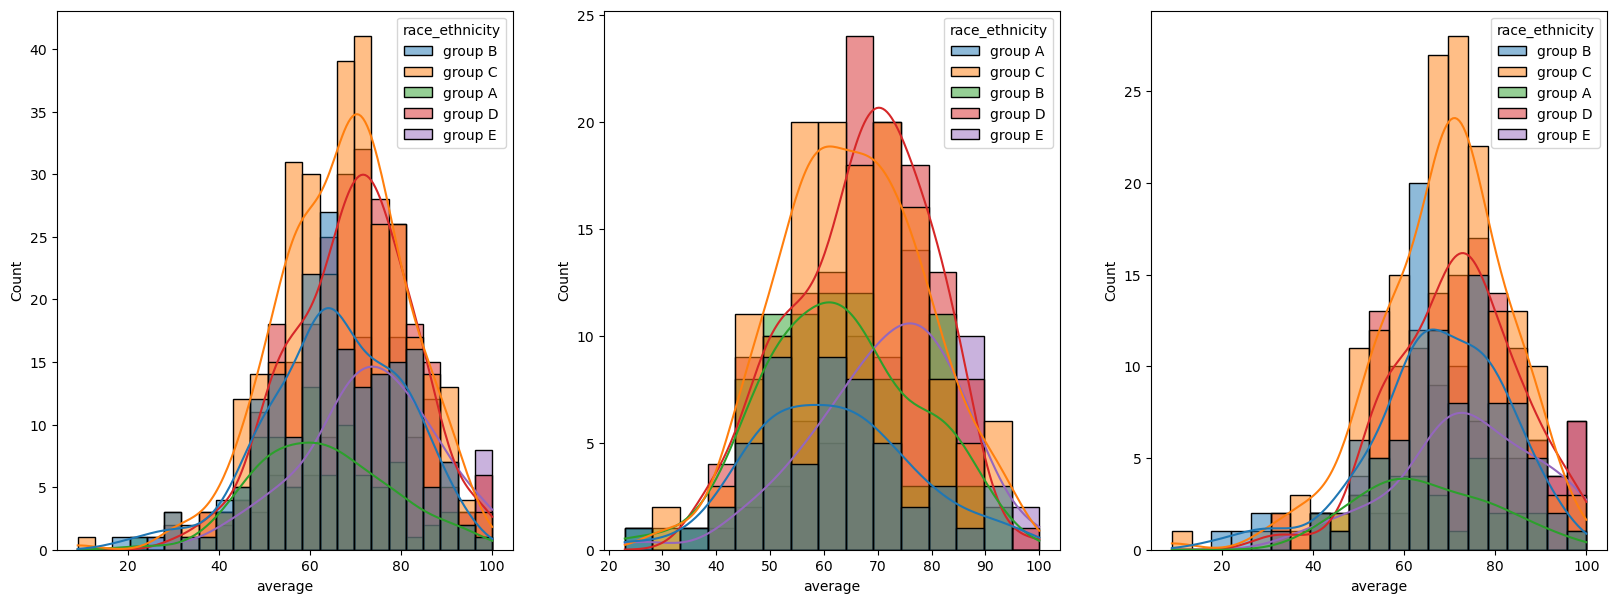

In [26]:
plt.subplots(1,3,figsize = (20,7))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue = 'race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='average',kde=True, hue= 'race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='average',kde=True, hue='race_ethnicity')
plt.show()

## Insights :

* Students of group A tends to perform poorly in exam.

## Score of students in each subject using violinplot

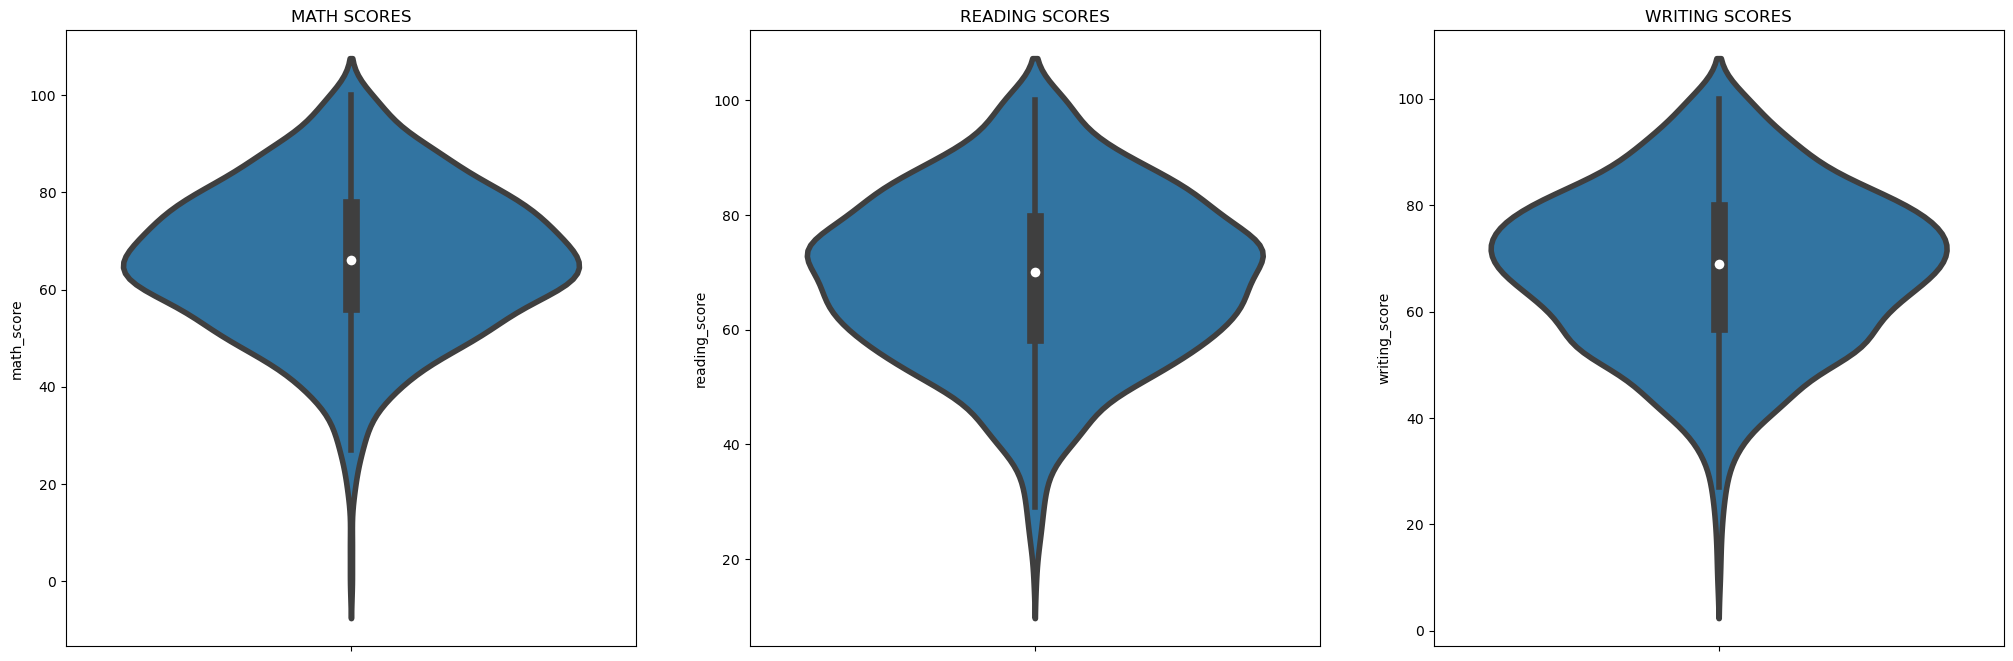

In [27]:
plt.subplots(1,3, figsize=(25,8))
plt.subplot(131)
plt.title('MATH SCORES')
sns.violinplot(data=df, y='math_score', linewidth=4)
plt.subplot(1,3,2)
plt.title('READING SCORES')
sns.violinplot(data=df, y='reading_score', linewidth=4)
plt.subplot(1,3,3)
plt.title('WRITING SCORES')
sns.violinplot(data=df, y='writing_score', linewidth=4)
plt.show()

## Insights :

* From the above plot it's visible that most of the students score 60-80 in maths, whereas most of them score 50-80 in reading and writing.

### Multivariate analysis using pieplot

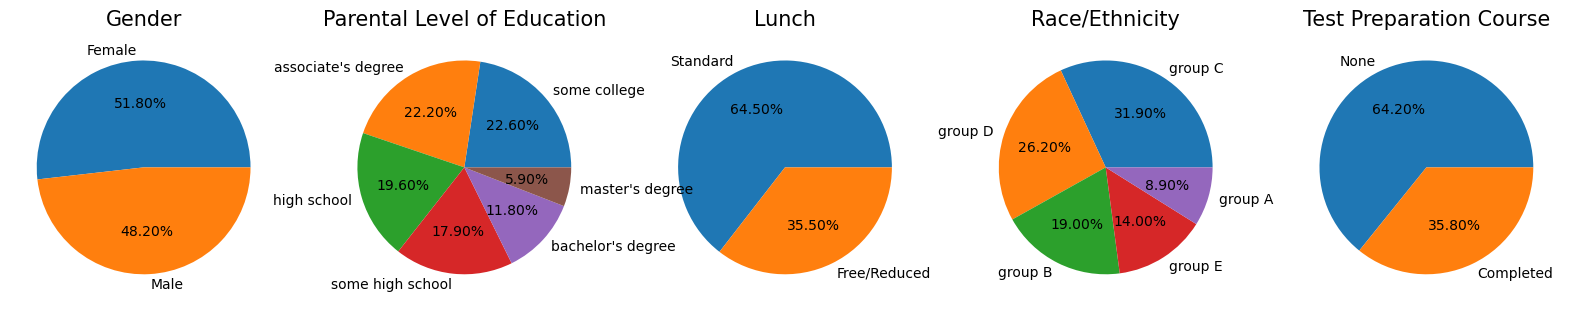

In [28]:
plt.subplots(1,4, figsize = (20,7))

# Pie Plot for Genders
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
#color = ['red','green']
plt.pie(size,labels=labels, autopct = '%.2f%%')
plt.title('Gender', fontsize = 15)
plt.axis('off')

# Pie Plot for Lunch
plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard','Free/Reduced'
#color = ['red','green']
plt.pie(size,labels=labels, autopct = '%.2f%%')
plt.title('Lunch', fontsize = 15)
plt.axis('off')

# Pie Plot for Race/Ethnicity
plt.subplot(1,5,4)
size = df['race_ethnicity'].value_counts()
labels = 'group C', 'group D', 'group B', 'group E', 'group A'
#color = ['red','green', 'cyan', 'blue', 'orange']
plt.pie(size,labels=labels, autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize = 15)
plt.axis('off')

# Pie Plot for Parental Level of Education
plt.subplot(1,5,2)
size = df['parental_level_of_education'].value_counts()
labels = 'some college',"associate's degree",'high school', 'some high school', "bachelor's degree", "master's degree" 
#colors = 'red', 'green', 'blue', 'cyan', 'yellow', 'orange'
plt.pie(size, labels=labels, autopct='%.2f%%')
plt.title('Parental Level of Education', fontsize=15)
plt.axis('off')

# Pie Plot for Parental Level of Education
plt.subplot(1,5,5)
size = df['test_preparation_course'].value_counts()
labels = 'None','Completed'
#colors = 'red', 'green'
plt.pie(size, labels=labels, autopct='%.2f%%')
plt.title('Test Preparation Course', fontsize=15)
plt.axis('off')

plt.show()

# Insights :

* Number of male and female students are almost equal
* Number of student whose parental education is 'some college' is greater, followed closely by 'associate's degree.
* Number of students with standard lunch is greater than free/reduced lunch.
* Number of students is greatest in group C.
* Most students did not enroll for test preparation course.

## Feature Wise Visualization

## Gender Column :

### UNIVARIATE ANALYSIS
How is gender column distributed ?

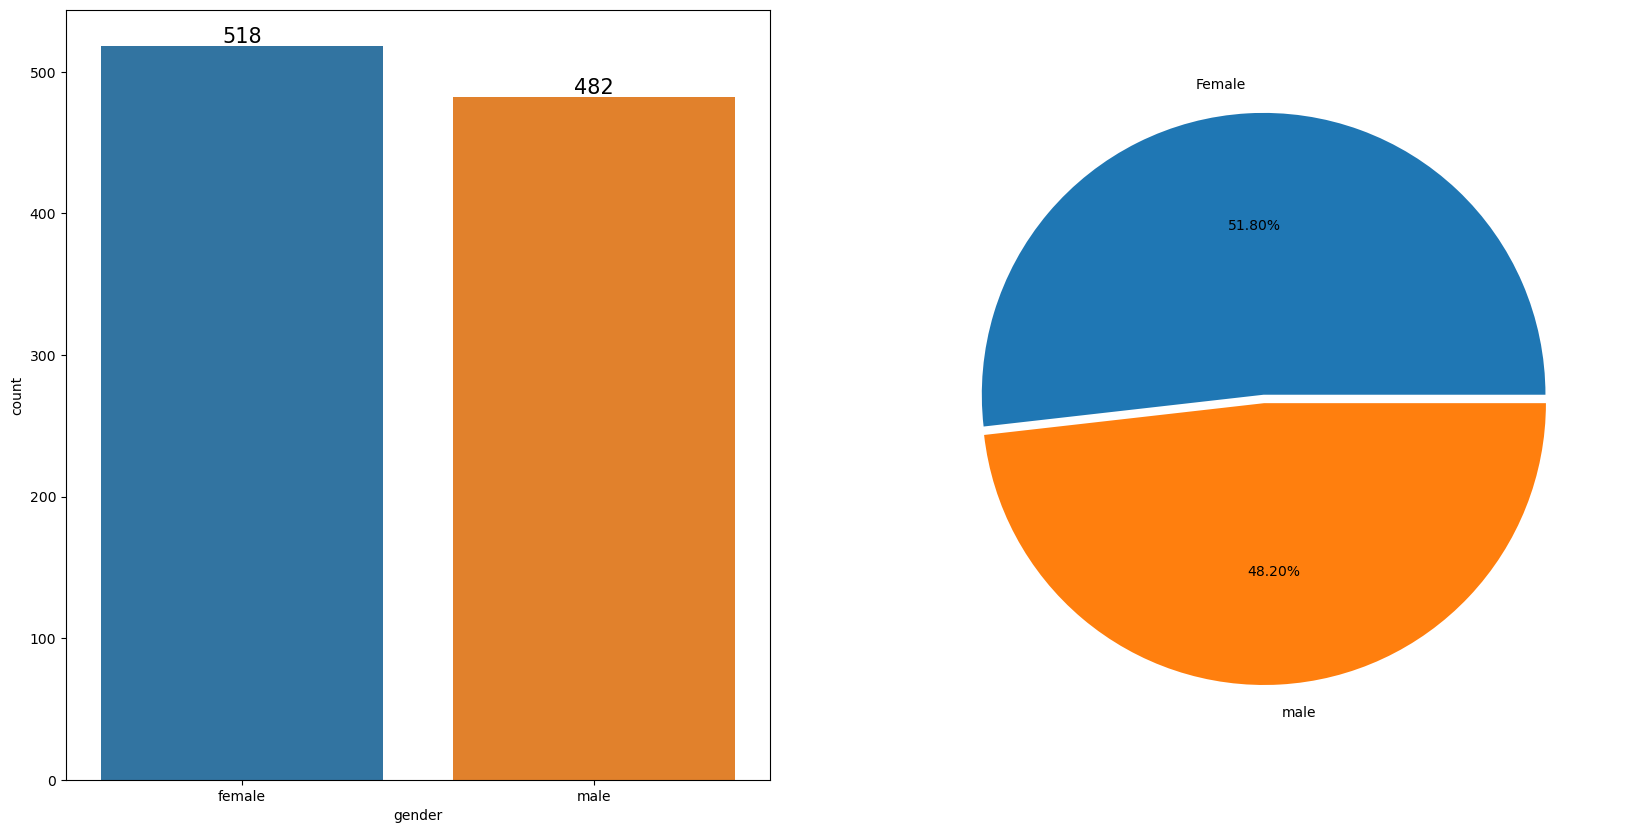

In [29]:
f,ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(data=df, x='gender', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, size=15)
ax[1].pie(x=df['gender'].value_counts(), labels=['Female','male'], explode=[0,0.03], autopct = '%.2f%%')
plt.show()

### BIVARIATE ANALYSIS

Does gender have any impact on student's performance?

In [30]:
gender_group = df.groupby('gender').mean('average')
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


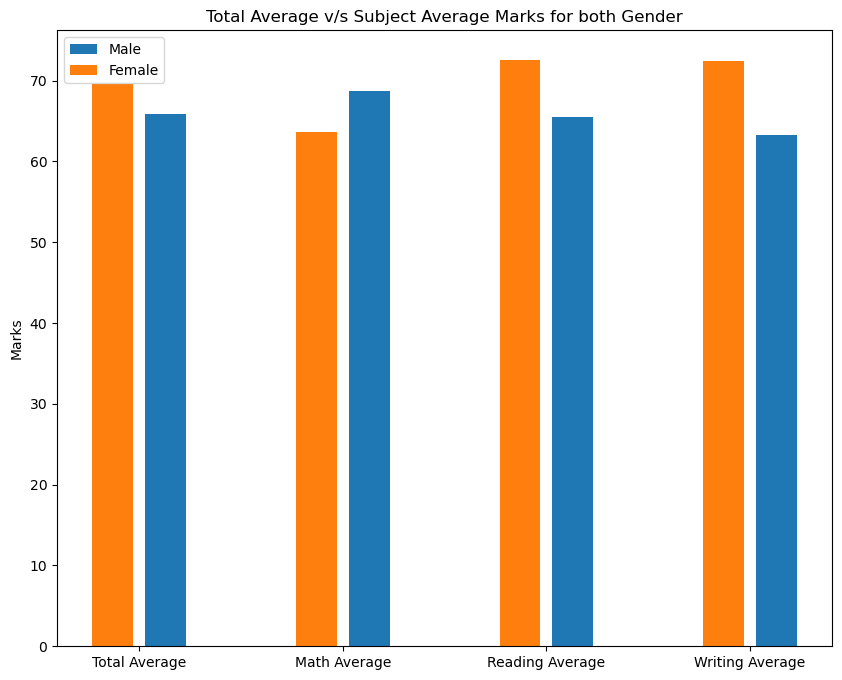

In [31]:
plt.figure(figsize=(10,8))

X =['Total Average', 'Math Average', 'Reading Average', 'Writing Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0], gender_group['reading_score'][0], gender_group['writing_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1], gender_group['reading_score'][1], gender_group['writing_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis + 0.13, male_scores, 0.2, label = 'Male', align = 'center')
plt.bar(X_axis - 0.13, female_scores, 0.2, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title('Total Average v/s Subject Average Marks for both Gender')
plt.legend()
plt.show()

## Insights :

* On an average females have better scores than men.
* Male scores in maths are higher than female, whereas female have higher scores in reading and writing.

## Race/Ethnicity Column


## UNIVARIATE ANALYSIS :
How is race/ethnicity column distributed ?

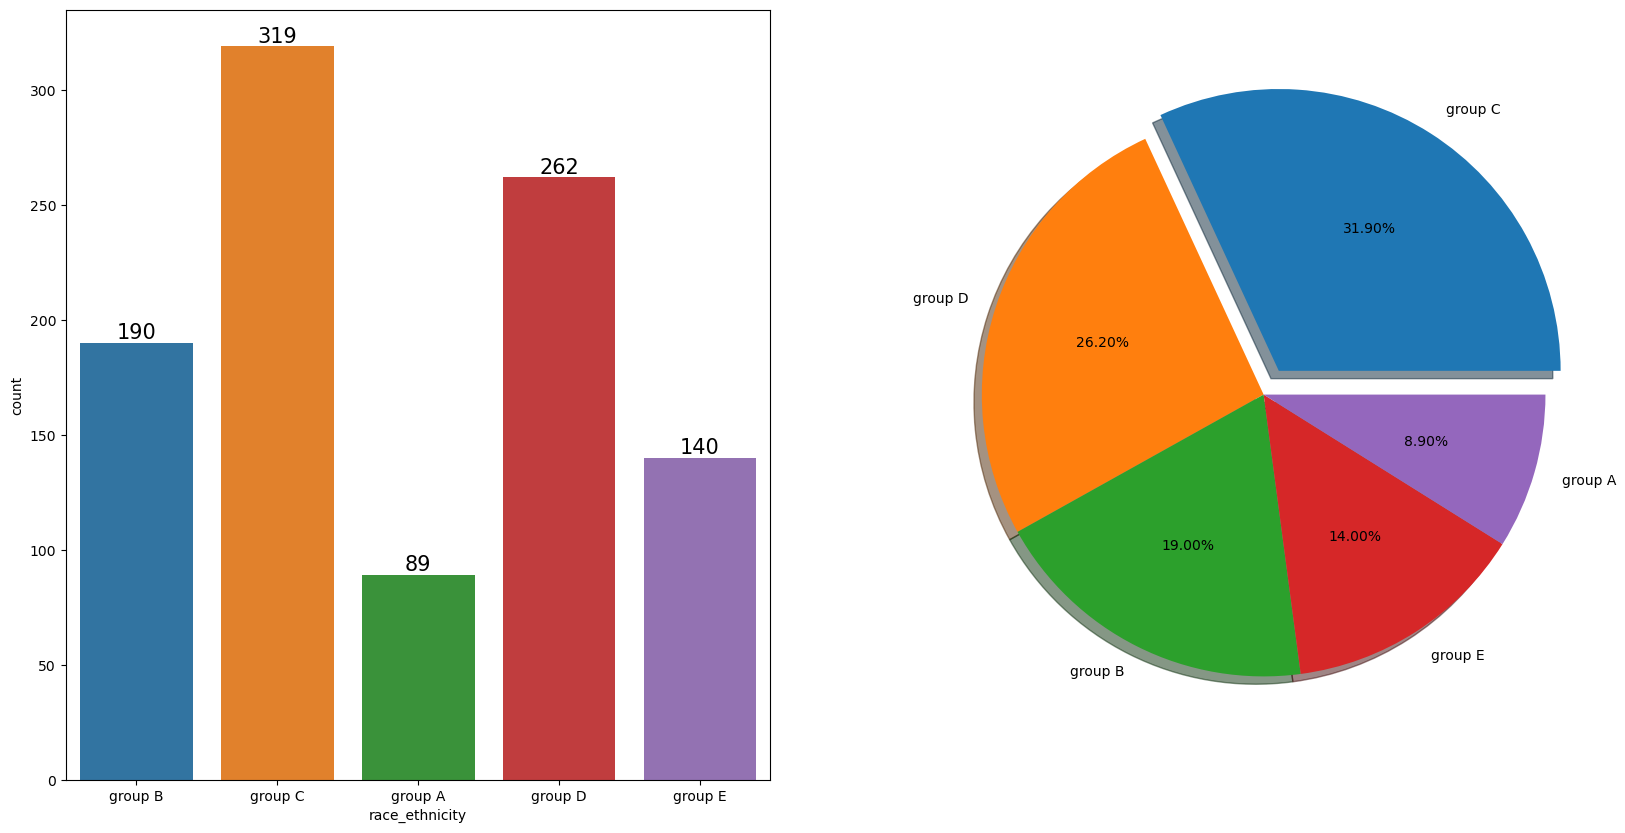

In [32]:
f, ax = plt.subplots(1,2, figsize=(20,10))

sns.countplot(data=df, x='race_ethnicity', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, fontsize = 15)
    
ax[1].pie(x=df['race_ethnicity'].value_counts(), labels = df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],shadow=True, autopct='%.2f%%')
plt.show()

## Insights :

* Most of the students belong to Group C, followed by Group D.
* Lowest number of students belong to Group A.

## BIVARIATE ANALYSIS

* Does Race/Ethnicity have an impact on student performance ?

In [33]:
race_group = df.groupby('race_ethnicity').mean('average')
race_group

,math_score,reading_score,writing_score,total_score,average
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


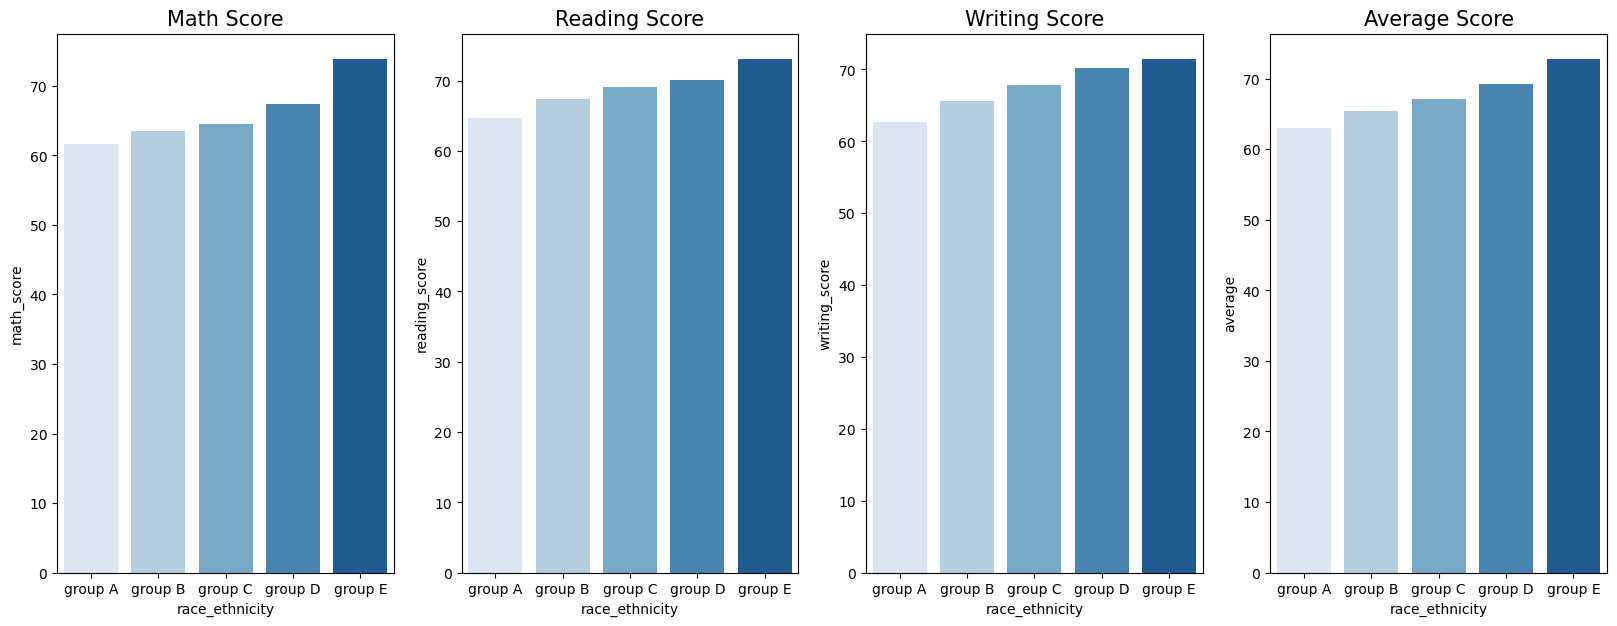

In [34]:
f, ax = plt.subplots(1,4, figsize=(20,7))

sns.barplot(x=race_group['math_score'].index, y=race_group['math_score'], ax=ax[0], palette = 'Blues')
ax[0].set_title('Math Score', size = 15)

sns.barplot(x=race_group['reading_score'].index, y=race_group['reading_score'], ax=ax[1], palette = 'Blues')
ax[1].set_title('Reading Score', size = 15)

sns.barplot(x=race_group['writing_score'].index, y=race_group['writing_score'], ax=ax[2], palette = 'Blues')
ax[2].set_title('Writing Score', size = 15)

sns.barplot(x=race_group['average'].index, y=race_group['average'], ax=ax[3], palette = 'Blues')
ax[3].set_title('Average Score', size = 15)
plt.show()

## Insights

* Group E students have scored the highest marks
* Group A students have scored the lowest marks

## Parental level of education column :

## UNIVARIATE ANALYSIS :
What is the educational background of student's parents ?

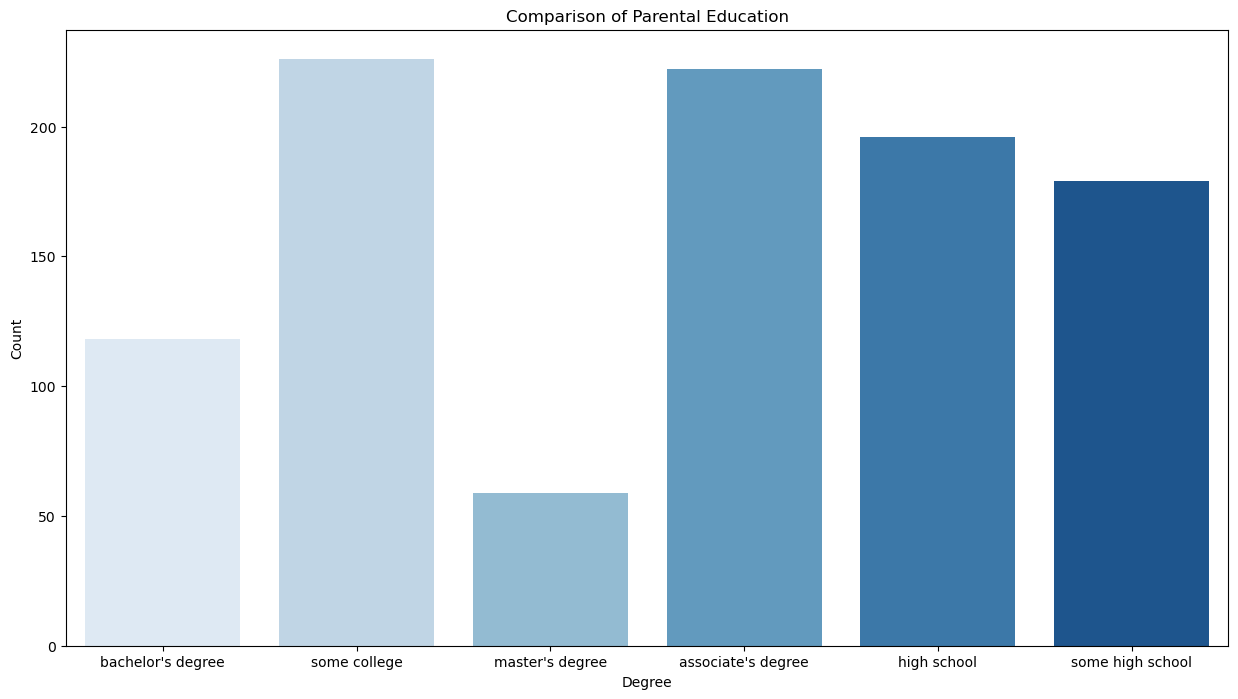

In [35]:
plt.subplots(1,1, figsize=(15,8))
sns.countplot(data=df, x='parental_level_of_education', palette = 'Blues')
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

## Insights :

* Largest number of parents are from some college, followed closely by associate's degree.

## BIVARIATE ANALYSIS :
Does parental education have any impact on student's performance ?

In [36]:
parental_group = df.groupby('parental_level_of_education').mean('average')
parental_group

,math_score,reading_score,writing_score,total_score,average
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


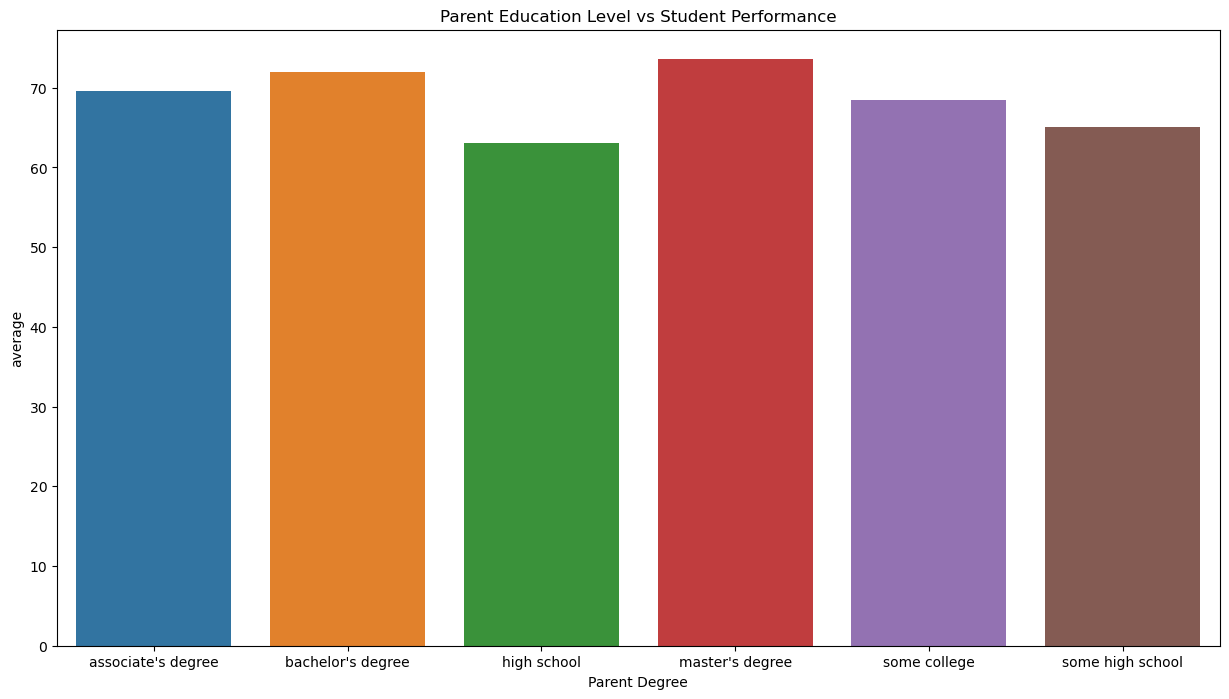

In [37]:
f, ax = plt.subplots(1,1, figsize=(15,8))

sns.barplot(x= parental_group['average'].index, y=parental_group['average'])
plt.title('Parent Education Level vs Student Performance')
plt.xlabel('Parent Degree')
plt.show()

## Insights :

* Students whose parents have Bachelor's or Master's degree tend to score higher in the tests.

## Lunch Column :





## UNIVARIATE ANALYSIS:

What are the types of lunch and which are famous ?

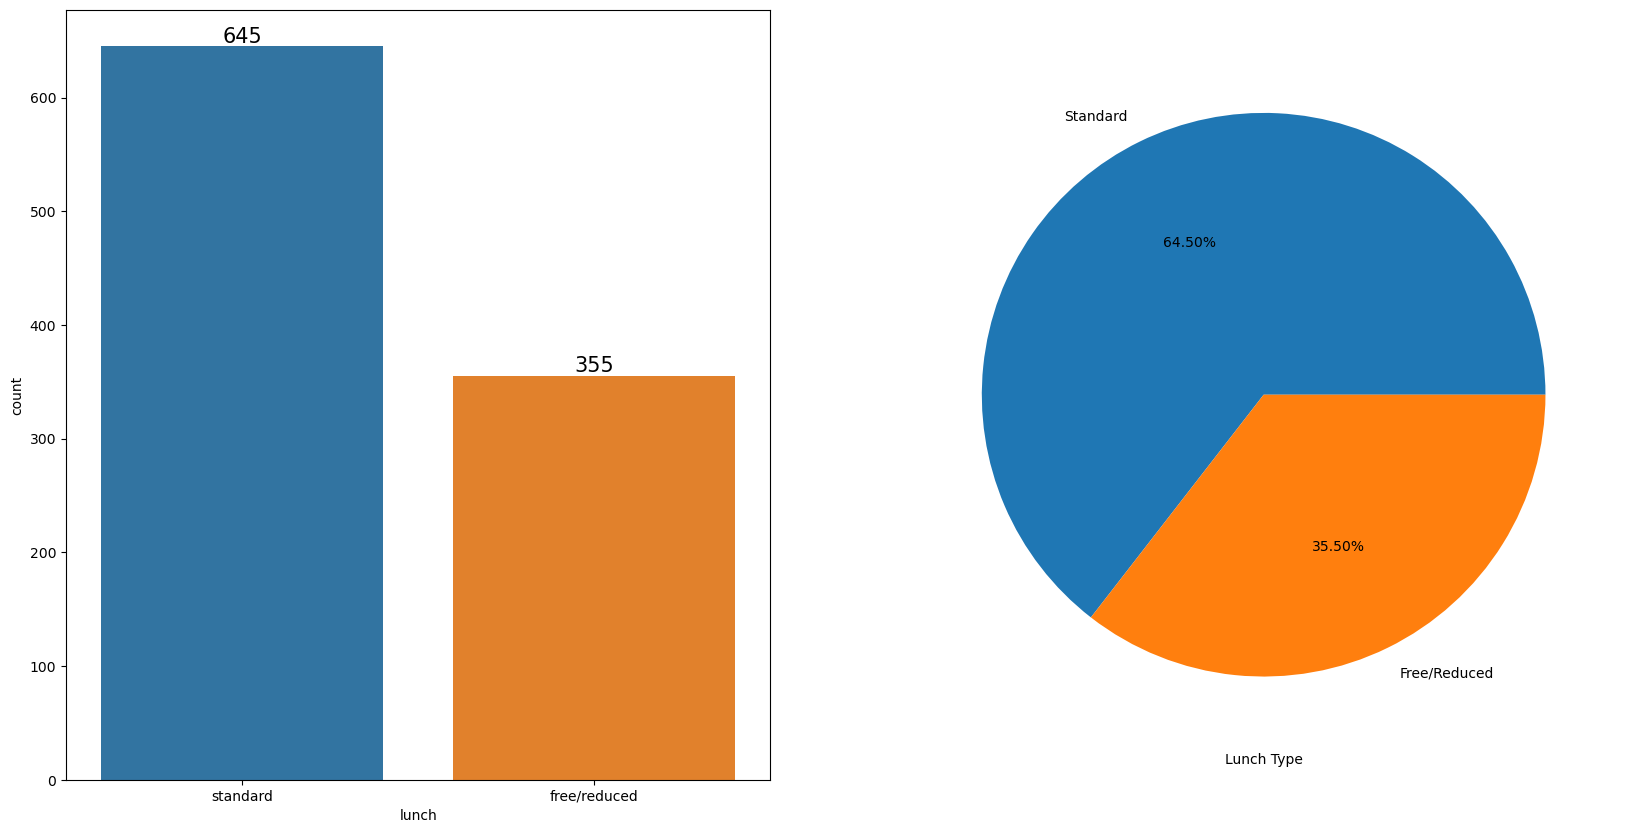

In [38]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(data=df, x='lunch', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, size = 15)
plt.xlabel('Lunch Type')
plt.pie(x=df['lunch'].value_counts(), labels = ['Standard', 'Free/Reduced'], autopct=('%.2f%%'))
plt.show()

## Insights :

* 64.5% students were being served standard lunch.

## BIVARIATE ANALYSIS:

Does lunch type has an impact on student performance ?

In [39]:
lunch_group = df.groupby('lunch').mean('average')
lunch_group

,math_score,reading_score,writing_score,total_score,average
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
standard,70.034109,71.654264,70.823256,212.511628,70.837209


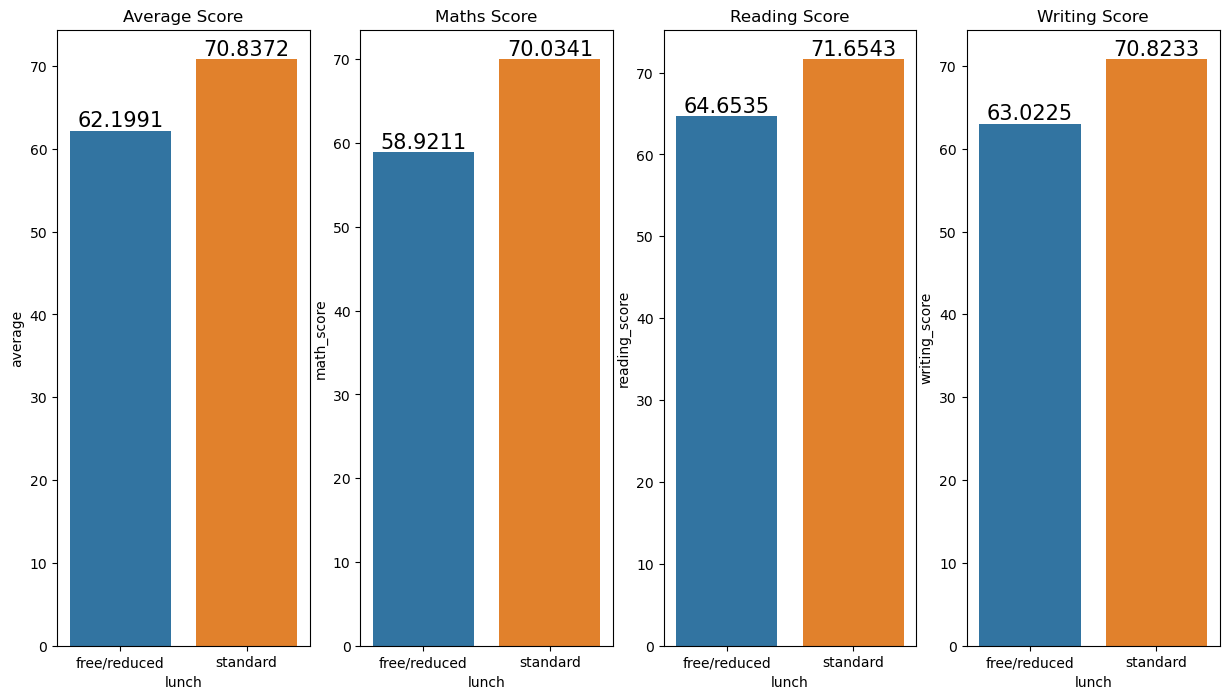

In [40]:
f, ax = plt.subplots(1,4, figsize=(15,8))

sns.barplot(x=lunch_group['average'].index, y=lunch_group['average'], ax=ax[0])
ax[0].set_title('Average Score')
for container in ax[0].containers:
    ax[0].bar_label(container, size=15)

sns.barplot(x=lunch_group['math_score'].index, y=lunch_group['math_score'], ax=ax[1])
ax[1].set_title('Maths Score')
for container in ax[1].containers:
    ax[1].bar_label(container, size=15)
    
sns.barplot(x=lunch_group['average'].index, y=lunch_group['reading_score'], ax=ax[2])
ax[2].set_title('Reading Score')
for container in ax[2].containers:
    ax[2].bar_label(container, size=15)

sns.barplot(x=lunch_group['average'].index, y=lunch_group['writing_score'], ax=ax[3])
ax[3].set_title('Writing Score')
for container in ax[3].containers:
    ax[3].bar_label(container, size=15)

plt.show()

## Insights :

* Students who get standard lunch tend to perform better than students with free/reduced lunch.

## Test Preparation Course Column:

## UNIVARIATE ANALYSIS :

* How many students take the test preparation course ?

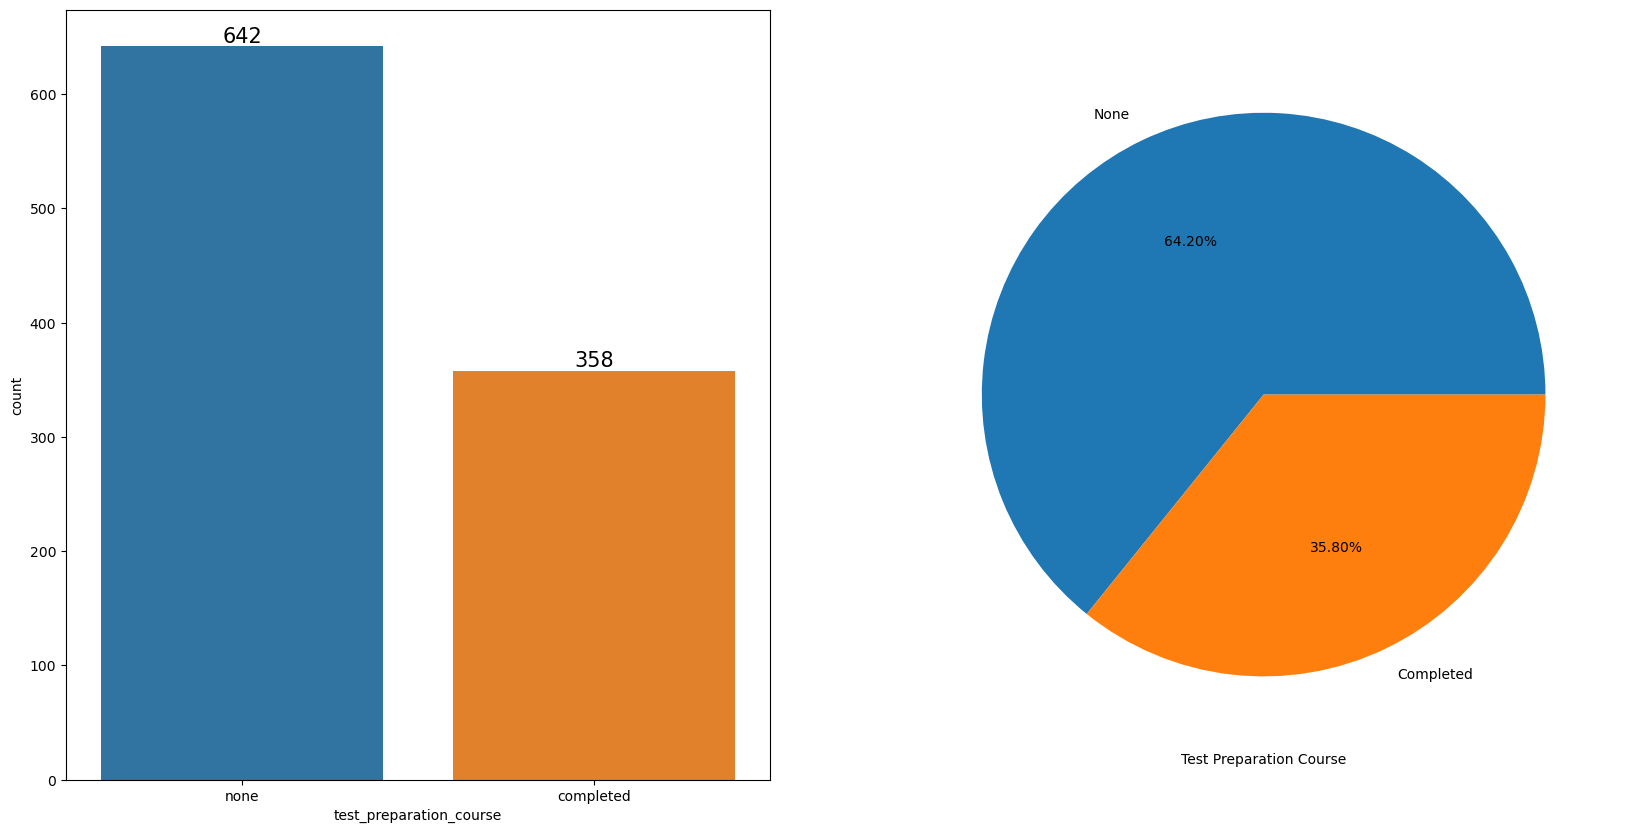

In [41]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(data=df, x='test_preparation_course', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, size = 15)
plt.xlabel('Test Preparation Course')
plt.pie(x=df['test_preparation_course'].value_counts(), labels = ['None', 'Completed'], autopct=('%.2f%%'))
plt.show()

## Insights :

* 64.2% students did not take any test preparation course.

## BIVARIATE ANALYSIS :

Does the test preparation course have an impact on student's performance in actual tests ?

In [42]:
test_group = df.groupby('test_preparation_course').mean('average')
test_group

,math_score,reading_score,writing_score,total_score,average
test_preparation_course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669460
none,64.077882,66.534268,64.504673,195.116822,65.038941


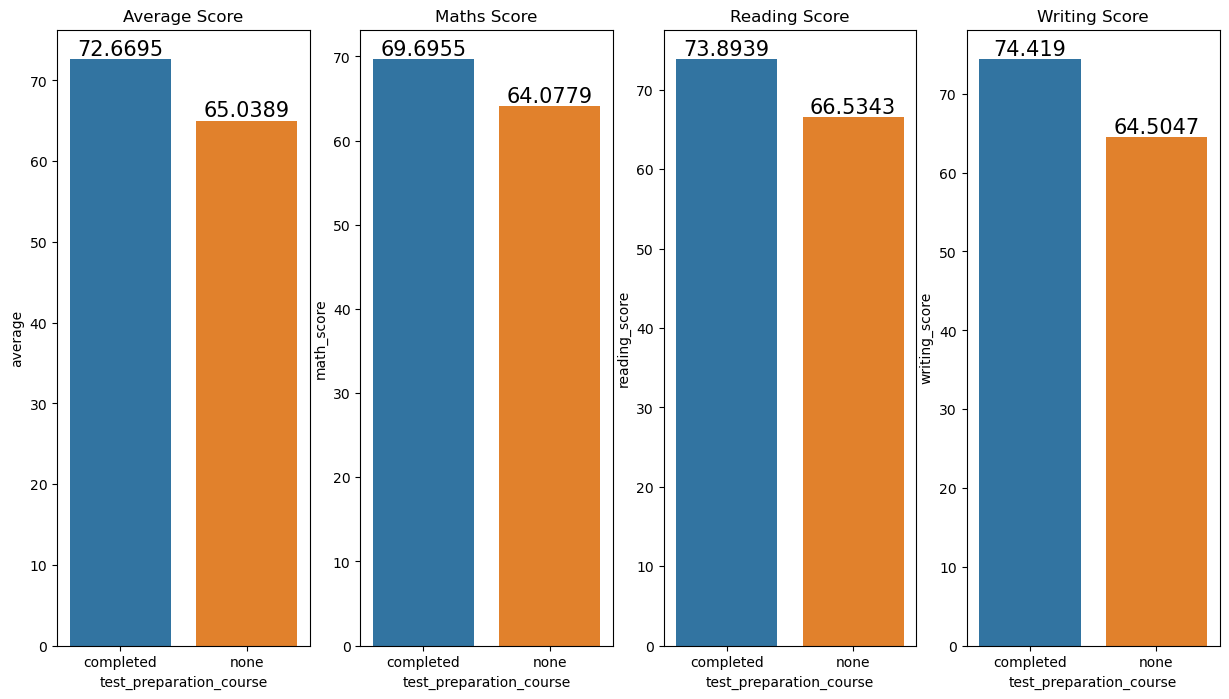

In [43]:
f, ax = plt.subplots(1,4, figsize=(15,8))

sns.barplot(x=test_group['average'].index, y=test_group['average'], ax=ax[0])
ax[0].set_title('Average Score')
for container in ax[0].containers:
    ax[0].bar_label(container, size=15)

sns.barplot(x=test_group['math_score'].index, y=test_group['math_score'], ax=ax[1])
ax[1].set_title('Maths Score')
for container in ax[1].containers:
    ax[1].bar_label(container, size=15)
    
sns.barplot(x=test_group['average'].index, y=test_group['reading_score'], ax=ax[2])
ax[2].set_title('Reading Score')
for container in ax[2].containers:
    ax[2].bar_label(container, size=15)

sns.barplot(x=test_group['average'].index, y=test_group['writing_score'], ax=ax[3])
ax[3].set_title('Writing Score')
for container in ax[3].containers:
    ax[3].bar_label(container, size=15)

plt.show()

## Insights :

* Those who have completed the test preparation course, tend to score higher in all 3 categories in the exams.

## Checking outliers :

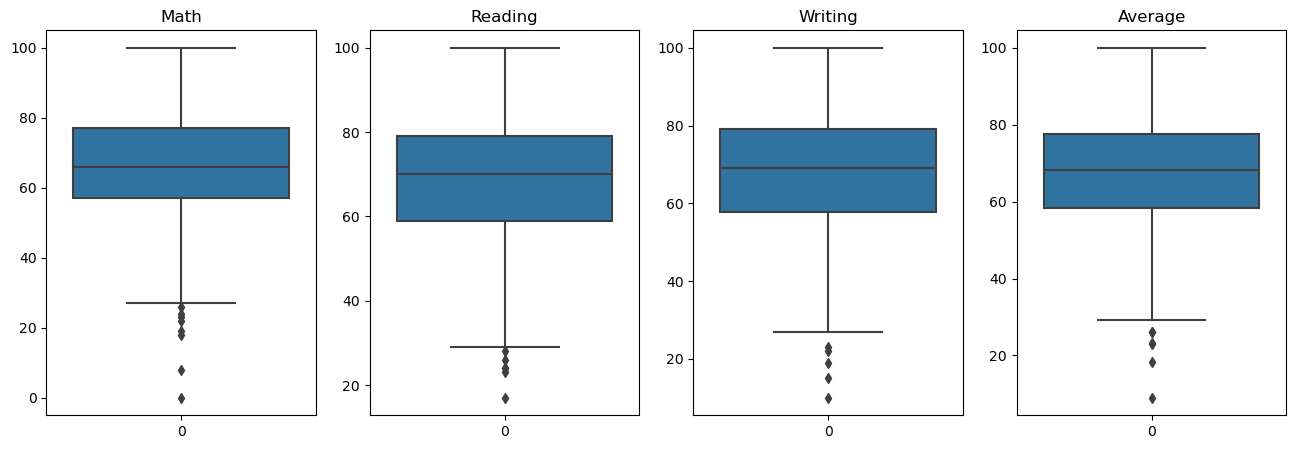

In [44]:
plt.subplots(1,4, figsize=(16,5))
plt.subplot(1,4,1)
sns.boxplot(df['math_score'])
plt.title('Math')
plt.subplot(1,4,2)
sns.boxplot(df['reading_score'])
plt.title('Reading')
plt.subplot(1,4,3)
sns.boxplot(df['writing_score'])
plt.title("Writing")
plt.subplot(1,4,4)
sns.boxplot(df['average'])
plt.title('Average')
plt.show()

## MULTIVARIATE ANALYSIS USING PAIRPLOT

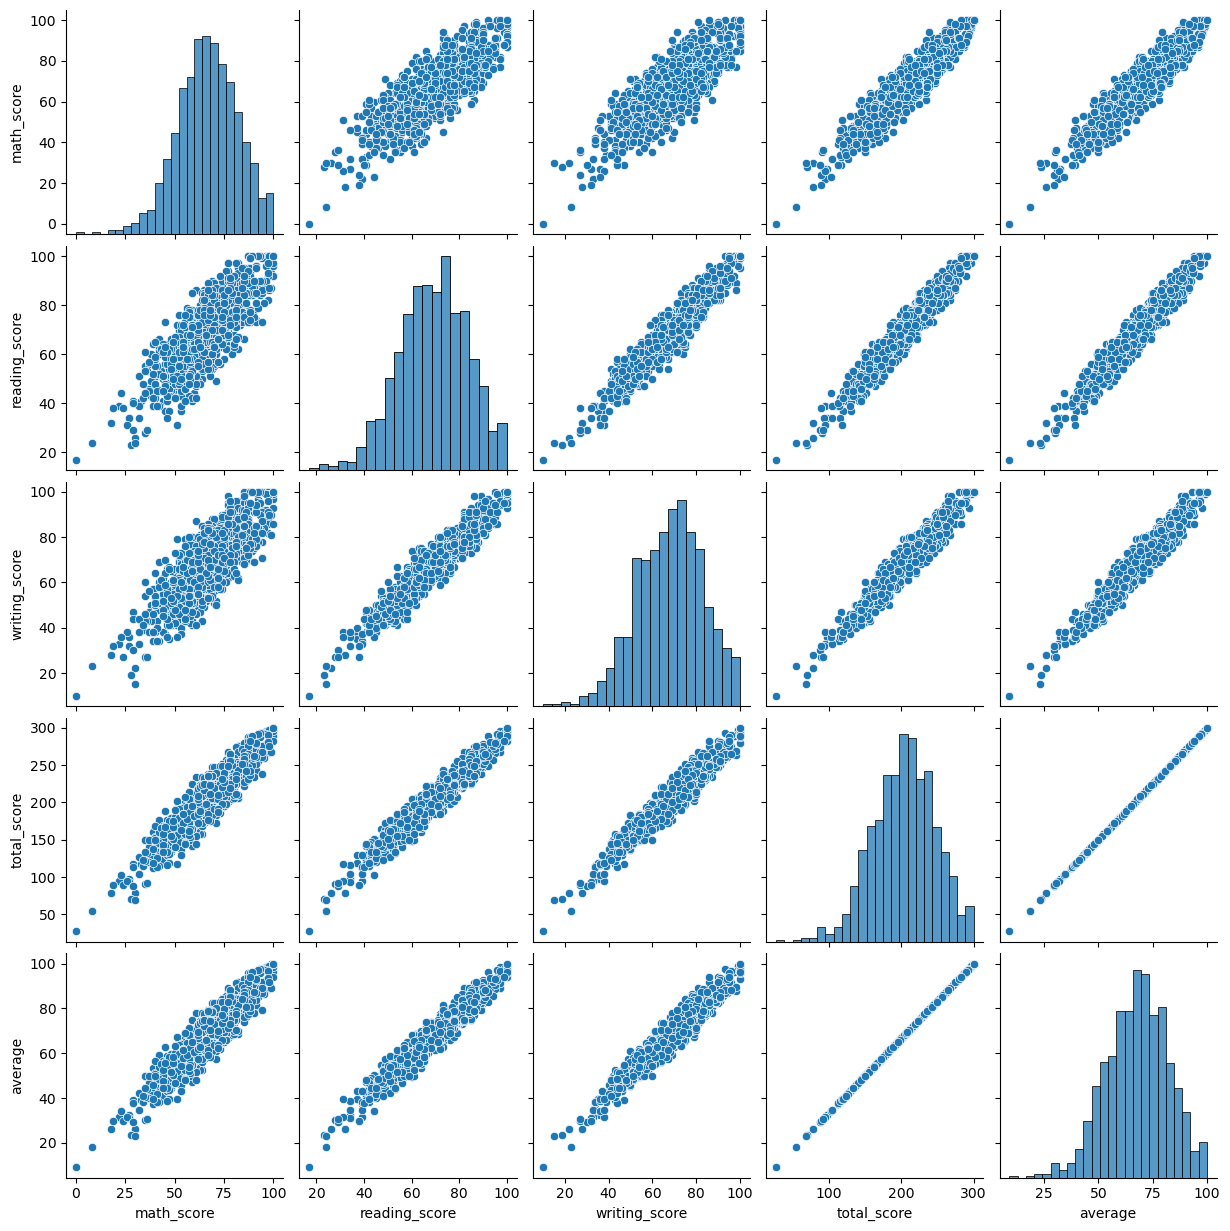

In [45]:
sns.pairplot(df)
plt.show()

## INSIGHTS :

* It's evident that scores increase linearly with each other.

# Conclusion :

* Student's performance is related with lunch, race and test preparation course.
* Finishing preparation course is benificial.
* Female students tend to score higher than male.
* Parental level of education does not impact the student performance as such.